In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Reading the Iris Dataset
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Displaying all classes of target variables
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Extracting all feature names for future visualization of Decision Tree
Feature_names=list(data.columns[2:])

## Data Pre-processing

In [5]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Species']= label_encoder.fit_transform(data['Species']) 
  
data['Species'].unique() 

array([0, 1, 2])

In [6]:
# Displaying target variable after Label Encoding
y=pd.Series(data.Species)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [7]:
X=data.drop(['Species','Id'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Test Train Split
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X,y,test_size=0.25)

## Decision Tree Classifier

In [9]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
# Making predictions and evaluating them
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



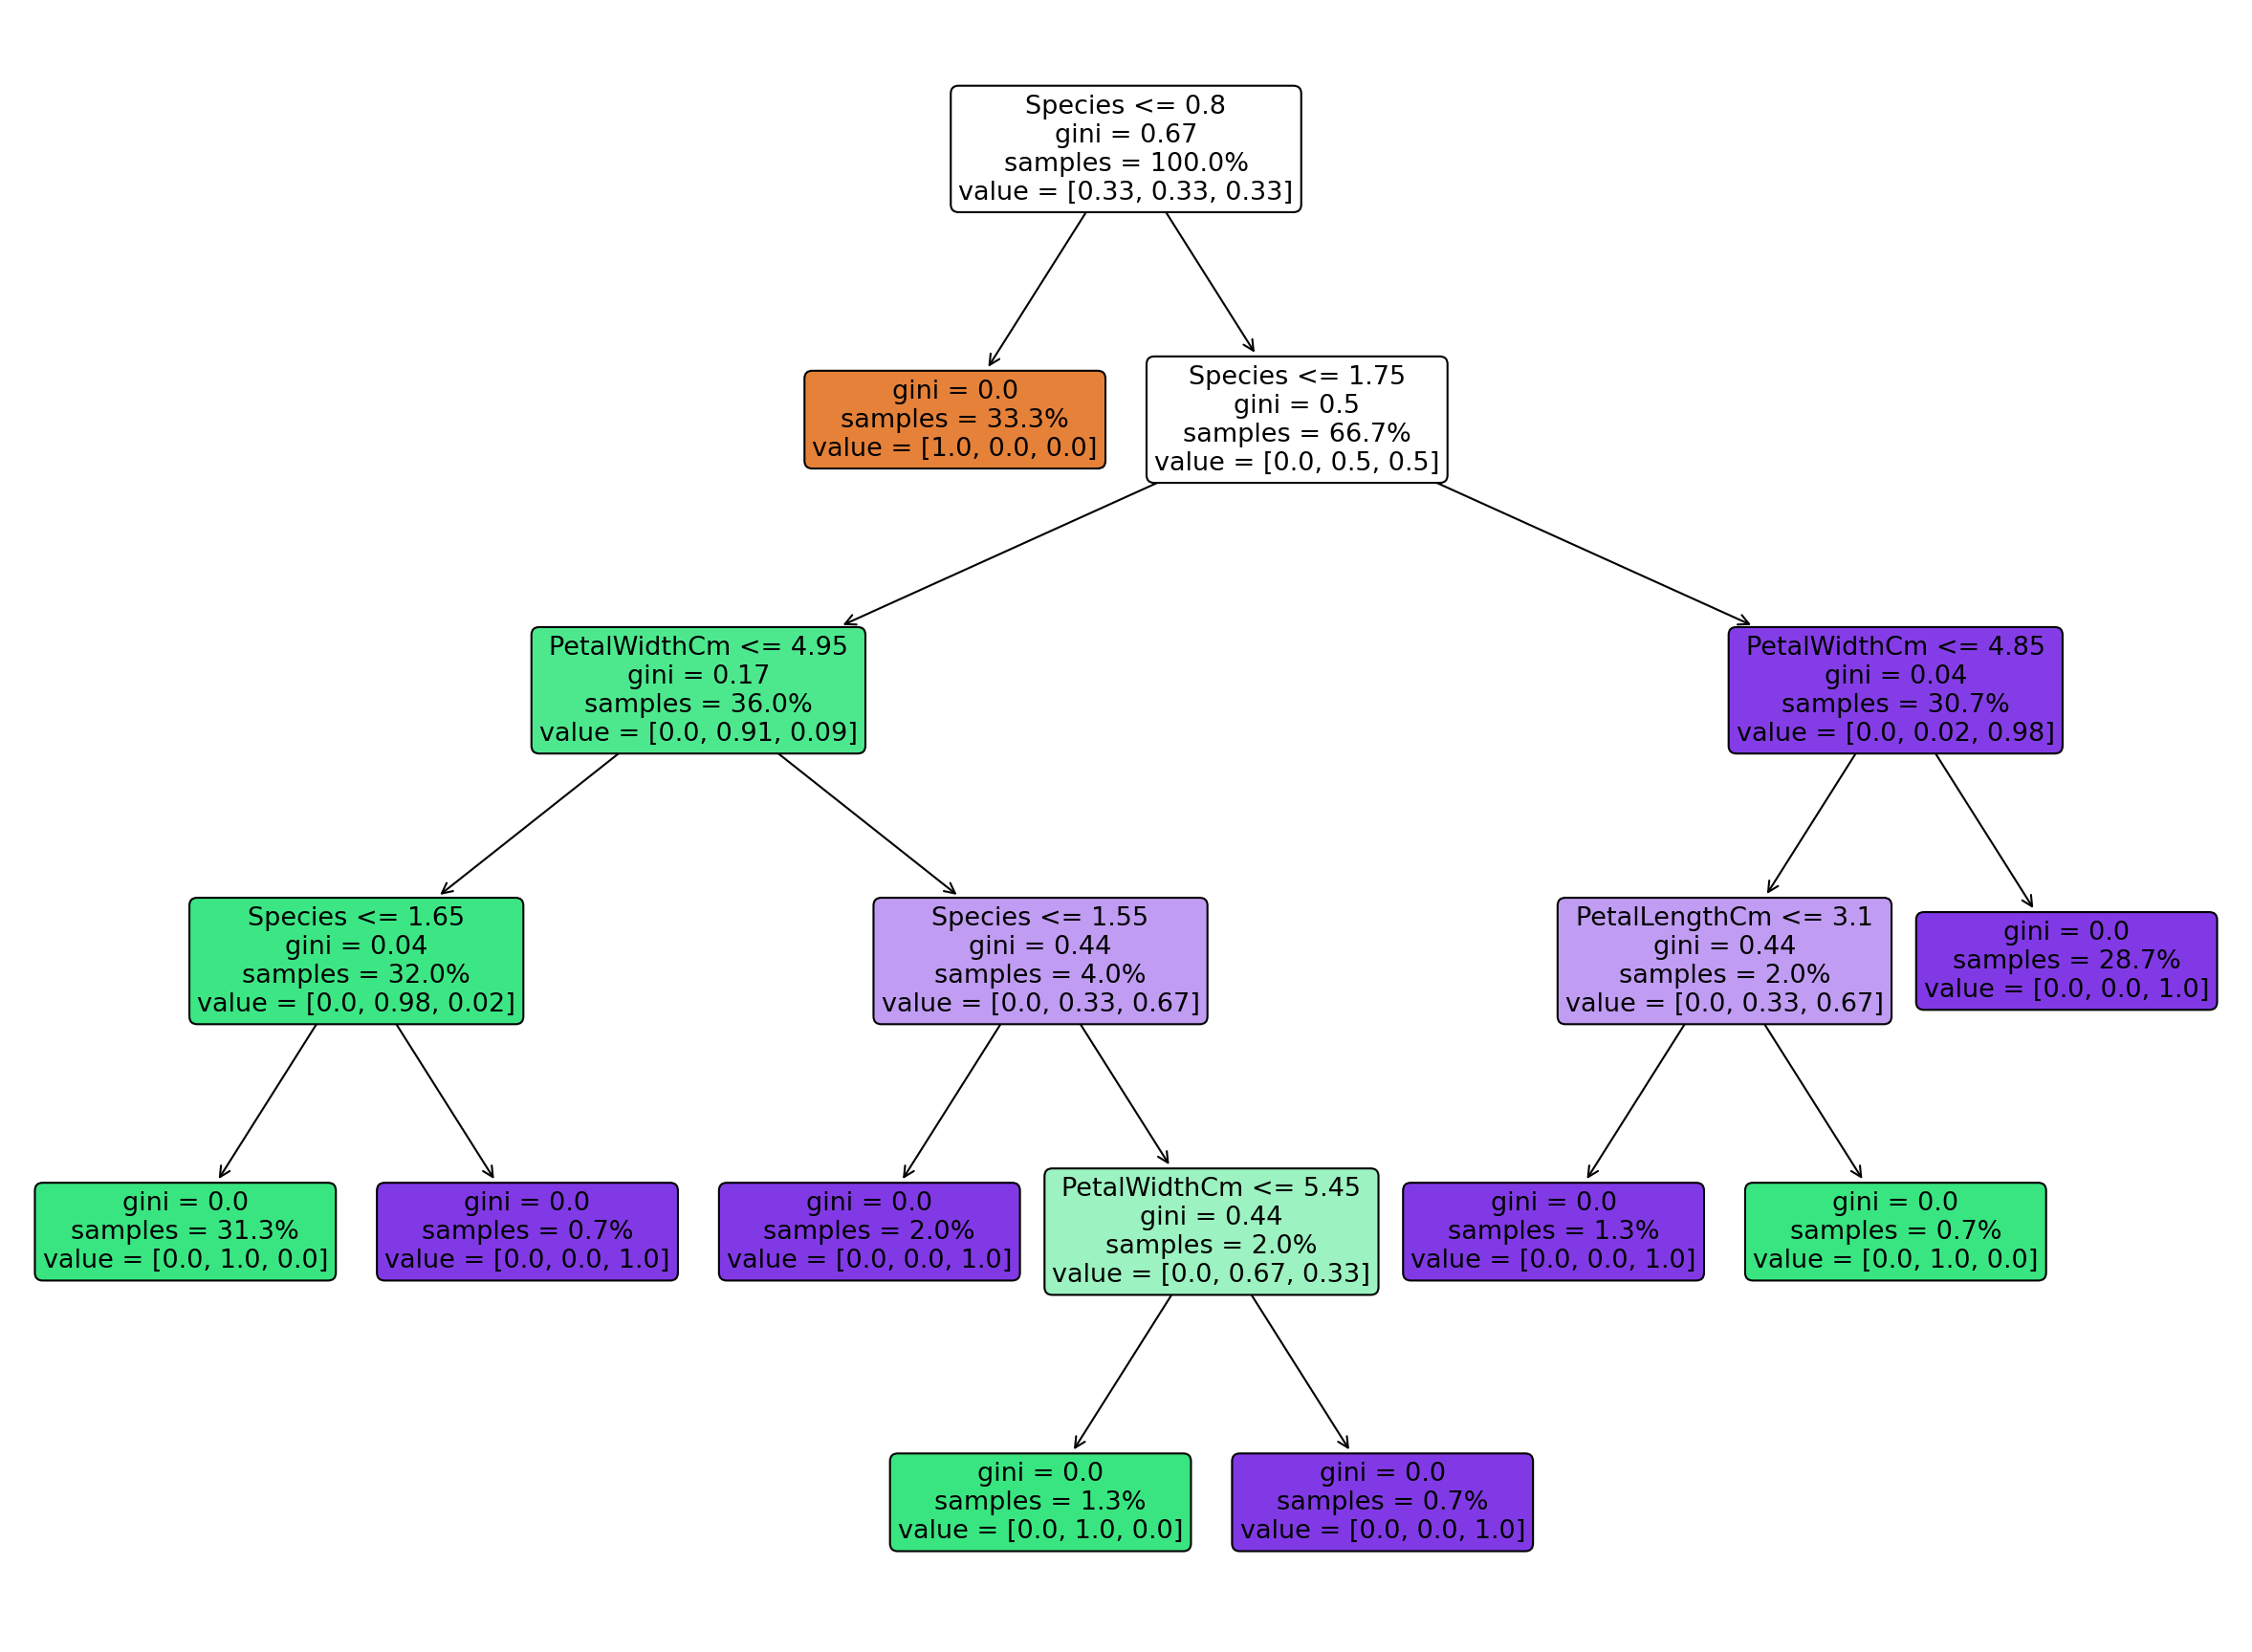

In [12]:
# Displaying the Decision Tree
from sklearn import tree

plt.figure(figsize = (20,15), facecolor = 'white', dpi = 150)
dt.fit(X, y)
tree_plt = tree.plot_tree(dt, feature_names = Feature_names, fontsize = 13, precision = 2, filled = True, proportion = True, rounded = 10)
plt.show()